In [1]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=a6703d2fecd03c655a907c3bd2202fcd251a9c4c0ae8a5230a6dff7afa82fa4a
  Stored in directory: c:\users\saifu\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as plt
import seaborn as sns
from matplotlib.axes import Axes

sns.set_palette("autumn")
plt.rc("axes", titlesize=18, titlepad=15, titleweight=500)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(10, 5.5))
plt.rc("font", family="serif", size=10)

from apyori import apriori

def annotate_column_chart(ax: Axes) -> Axes:
    """Add annotations to a column chart.
    
    Args:
        ax (matplotlib.axes.Axes): A column chart.
    
    Returns:
        matplotlib.axes.Axes: Annotated column chart.
    """
    for p in ax.patches:
        p.set_width(0.7)
        ax.annotate(f"{p.get_height():,}", ha="center",
                xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.01))
    return ax

data = pd.read_csv('./Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#converting dataframe into list of lists
dataframe_list=[]

# values of range is according to the number of rows and columns
for i in range(1,7501):
    dataframe_list.append([str(data.values[i,j]) for j in range(0,20)])
dataframe_list

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [5]:
#applying apriori algorithm
association_rules = apriori(dataframe_list, min_support=0.0045, min_confidence=0.2,
                            min_lift=3, min_length=2)
association_results = list(association_rules)

In [7]:
association_results[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])

In [11]:
Rule = []
Support = []
Confidence = []
Lift = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    Rule.append(items)
    Support.append(str(item[1]))
    Confidence.append(str(item[2][0][2]))
    Lift.append(str(item[2][0][3]))

dict = {'Rule': Rule, 'Support': Support, 'Confidence': Confidence, "Lift": Lift} 
d = pd.DataFrame(dict)
d

,Rule,Support,Confidence,Lift
0,"[light cream, chicken]",0.004533333333333334,0.2905982905982906,4.843304843304844
1,"[mushroom cream sauce, escalope]",0.005733333333333333,0.30069930069930073,3.7903273197390845
2,"[pasta, escalope]",0.005866666666666667,0.37288135593220345,4.700185158809287
3,"[herb & pepper, ground beef]",0.016,0.3234501347708895,3.2915549671393096
4,"[ground beef, tomato sauce]",0.005333333333333333,0.37735849056603776,3.840147461662528
5,"[olive oil, whole wheat pasta]",0.008,0.2714932126696833,4.130221288078346
6,"[shrimp, pasta]",0.005066666666666666,0.3220338983050848,4.514493901473151
7,"[light cream, chicken, nan]",0.004533333333333334,0.2905982905982906,4.843304843304844
8,"[shrimp, frozen vegetables, chocolate]",0.005333333333333333,0.23255813953488372,3.260160834601174
9,"[ground beef, cooking oil, spaghetti]",0.0048,0.5714285714285714,3.281557646029315


## 1. Objectives
<b>Check data quality.</b>
<ul>
    <li>Use exploratory data analysis to derive insights on product performance.</li>
    <li>Apply association-rule-mining to discover opportunities for cross-selling.</li>
</ul>

## 2. Data Cleaning

In [12]:
all_products = data.melt()["value"].dropna().sort_values()

# Find items that start or end with whitespace
all_products[all_products.str.contains("^\s|\s$")].to_list()

[' asparagus']

One instance of the item "asparagus" contains leading whitespace. Other than that, the data looks fine.

In [13]:
data.replace(" asparagus", "asparagus", inplace=True)
all_products.replace(" asparagus", "asparagus", inplace=True)

print(f"There are {all_products.nunique()} different products:\n\n", all_products.unique())

There are 119 different products:

 ['asparagus' 'almonds' 'antioxydant juice' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

## 3. Exploratory Data Analysis

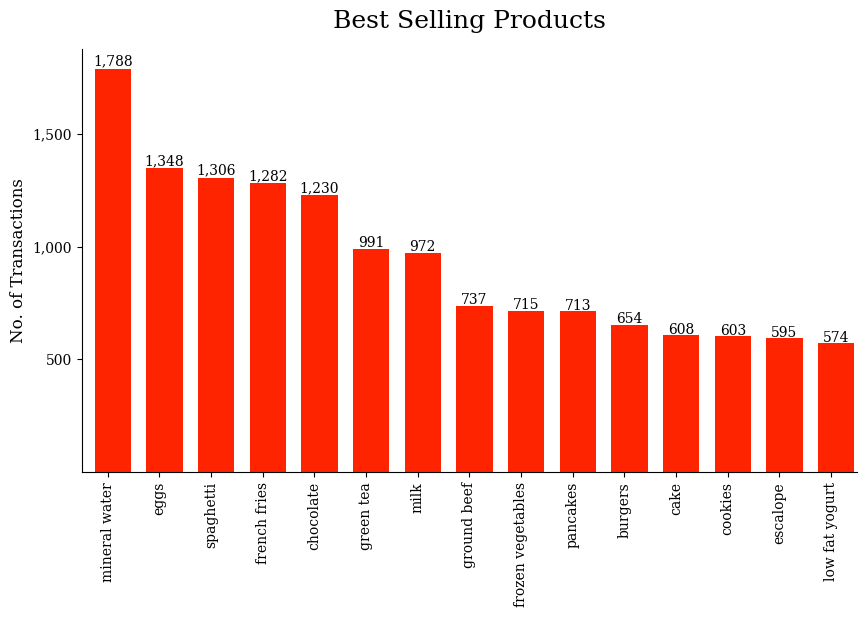

In [18]:
# Best-selling products
item_counts = all_products.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar", title="Best Selling Products")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_formatter(plt.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(plt.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

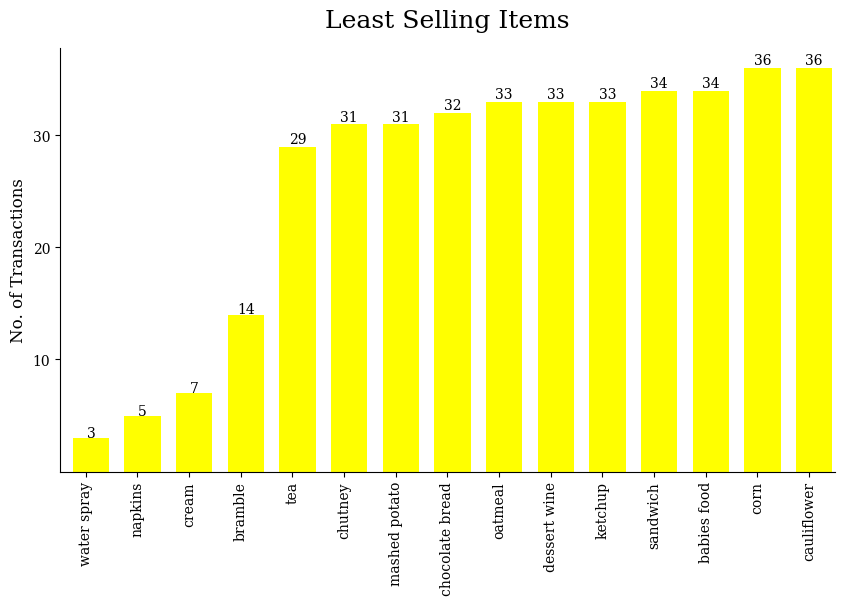

In [19]:
# Worst performing products
ax = item_counts.nsmallest(15).plot(kind="bar", color="yellow", title="Least Selling Items")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_locator(plt.ticker.FixedLocator([10, 20, 30]))

_ = annotate_column_chart(ax)

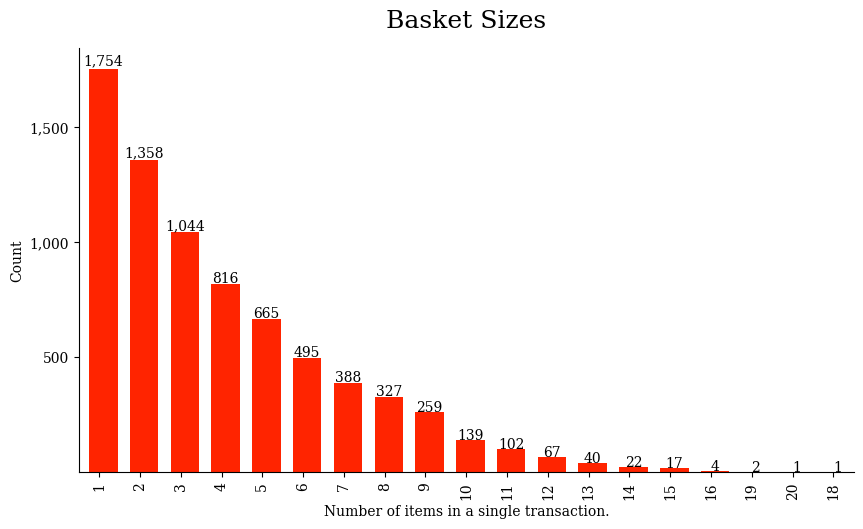

In [20]:
# Distribution of Basket sizes
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar(title="Basket Sizes")
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")
ax.yaxis.set_major_formatter(plt.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(plt.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

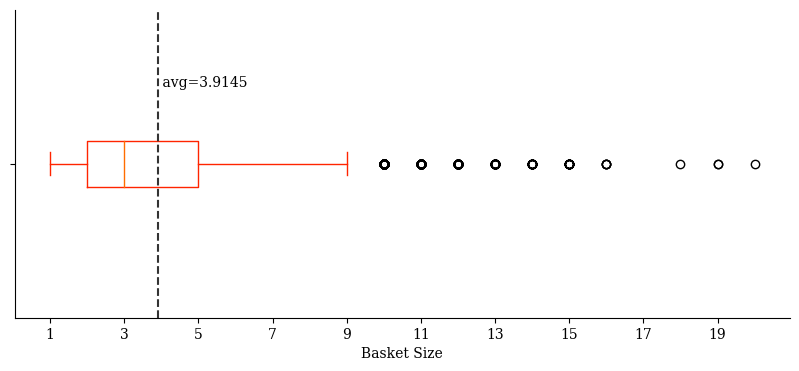

In [21]:
avg_basket_size = basket_sizes.mean()
ax = basket_sizes.plot.box(vert=False, figsize=(10, 4))
ax.axvline(avg_basket_size, 0, 1, linestyle="--", label="mean", color="#333")
ax.text(avg_basket_size, 1.25, f" avg={avg_basket_size:.4f}")
ax.set_xlabel("Basket Size")
ax.set_yticklabels([])
ax.xaxis.set_major_locator(plt.ticker.FixedLocator(range(1, 21, 2)))

In [22]:
basket_sizes.describe()

count    7501.000000
mean        3.914545
std         2.905540
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        20.000000
dtype: float64

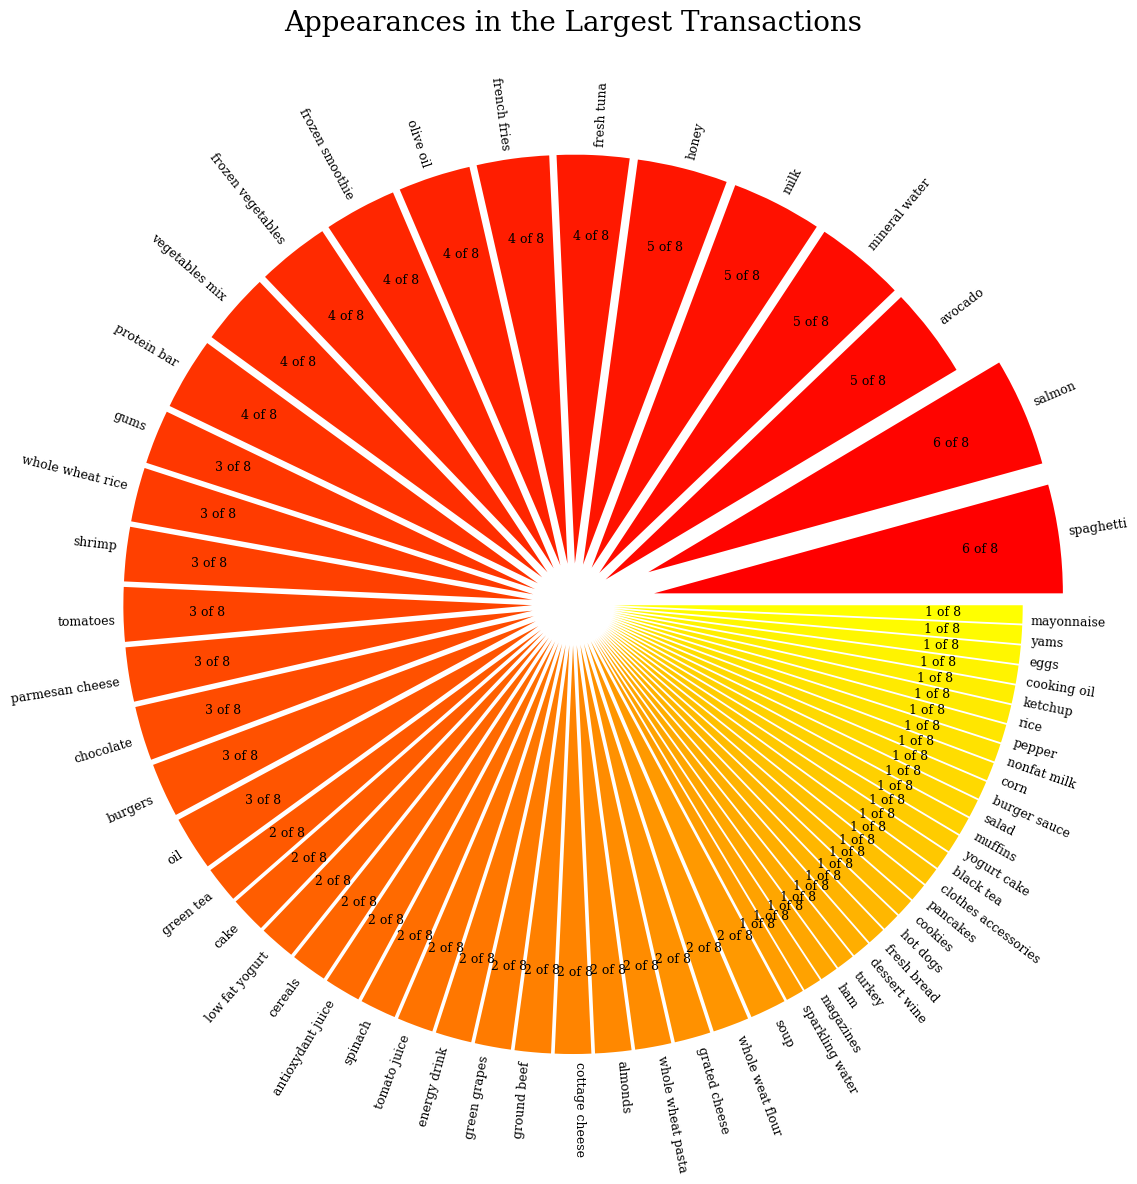

In [23]:
items_in_largest_transactions = data[basket_sizes > 15].melt()['value'].dropna()

pie_data = items_in_largest_transactions.value_counts()
ax = pie_data.plot.pie(
    cmap="autumn",
    explode=[0.2] * 2 + [0.1] * 59,
    figsize=(12, 12),
    autopct=lambda pct: f" {pct * 0.01 * pie_data.sum():.0f} of 8",
    pctdistance=0.8,
    labeldistance=1.02,
    rotatelabels=True,
    textprops={"size": 9},
)
ax.set_title("Appearances in the Largest Transactions", size=20, pad=45)
ax.set_ylabel("")
ax.figure.tight_layout()

In [27]:
data[basket_sizes == 1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7489,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7491,herb & pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


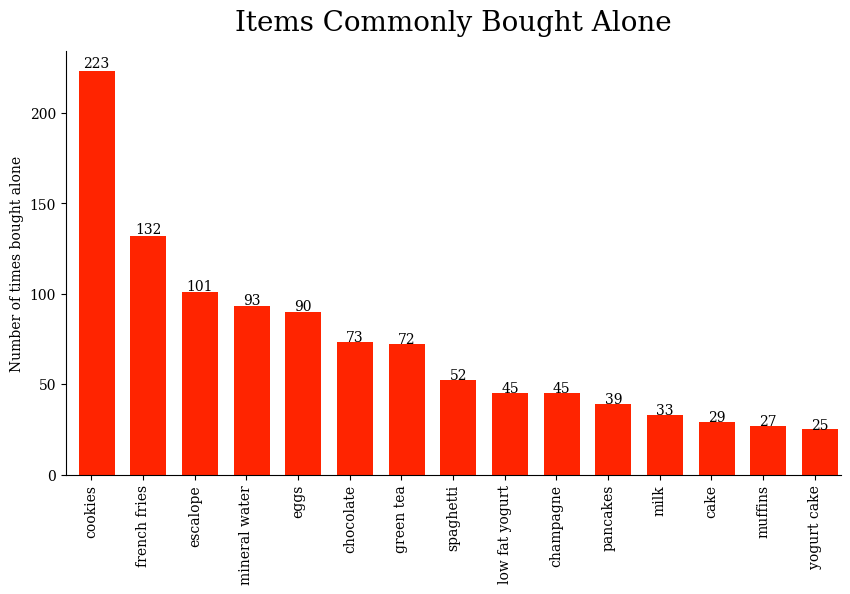

In [29]:
items = all_products.unique()
single_items = data[basket_sizes == 1][0].value_counts()
ax = single_items.head(15).plot.bar()
ax.set_title("Items Commonly Bought Alone", size=20, pad=15, weight=500)
ax.set_ylabel("Number of times bought alone")

_ = annotate_column_chart(ax)

## Association Rule Mining (APRIORI)


In [30]:
!pip install efficient-apriori

In [31]:
baskets = [tuple(row.dropna()) for _, row in data[basket_sizes > 1].iterrows()]
baskets[-5:]

[('pancakes', 'light mayo'),
 ('butter', 'light mayo', 'fresh bread'),
 ('burgers',
  'frozen vegetables',
  'eggs',
  'french fries',
  'magazines',
  'green tea'),
 ('escalope', 'green tea'),
 ('eggs', 'frozen smoothie', 'yogurt cake', 'low fat yogurt')]

### Potential opportunities for cross-selling are:

In [32]:
from efficient_apriori import apriori

item_sets, association_rules = apriori(baskets, min_support=0.03, min_confidence=0.3)

# Get 1 to 1 rules e.g. {bread} -> {butter}
one_to_one_rules = filter(
    lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, association_rules
)
for rule in sorted(one_to_one_rules, key=lambda rule: rule.lift):
    print(rule)

{eggs} -> {mineral water} (conf: 0.304, supp: 0.066, lift: 1.030, conv: 1.013)
{shrimp} -> {mineral water} (conf: 0.339, supp: 0.031, lift: 1.150, conv: 1.067)
{low fat yogurt} -> {mineral water} (conf: 0.340, supp: 0.031, lift: 1.154, conv: 1.069)
{chocolate} -> {mineral water} (conf: 0.342, supp: 0.069, lift: 1.159, conv: 1.071)
{cake} -> {mineral water} (conf: 0.356, supp: 0.036, lift: 1.206, conv: 1.094)
{spaghetti} -> {mineral water} (conf: 0.357, supp: 0.078, lift: 1.211, conv: 1.097)
{tomatoes} -> {mineral water} (conf: 0.370, supp: 0.032, lift: 1.256, conv: 1.120)
{pancakes} -> {mineral water} (conf: 0.375, supp: 0.044, lift: 1.273, conv: 1.129)
{milk} -> {mineral water} (conf: 0.383, supp: 0.063, lift: 1.300, conv: 1.143)
{frozen vegetables} -> {mineral water} (conf: 0.385, supp: 0.047, lift: 1.306, conv: 1.147)
{frozen vegetables} -> {spaghetti} (conf: 0.300, supp: 0.036, lift: 1.376, conv: 1.117)
{ground beef} -> {mineral water} (conf: 0.429, supp: 0.053, lift: 1.454, conv: 